<a href="https://colab.research.google.com/github/YoooonaLee/Statistics-learning/blob/main/Central_Limit_Theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

⭐

#중심 극한 정리

>  동일한 확률분포를 가진 독립 확률 변수 n개의 평균의 분포는 n이 적당히 크다면 정규분포에 가까워진다는 정리

> n이 충분히 크다면 모집단의 분포가 정규분포가 아니더라도, ⭐표본 평균의 분포가 정규분포에 가까워진다⭐는 이론



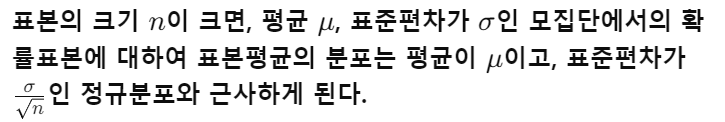



##Why CLT?
통계적이 추정이나 분석은 데이터 정규분포라는 가정하에 일어날 수 있는 것.

따라서 분석을 위한 데이터는 최대한 정규분포와 일치하는 데이터셋이 되어야한다.



##예시로 이해하기

광장에 30만명의 사람들이 모여있고,
 나이,성별,키,몸무게 어떠한 사항과도 무관하게 완전 무작위로 뽑아서 팀을 구성하도록 한다.

그룹당 들어갈 수 있는 인원 수 즉 표본크기를 30~30000까지 지정

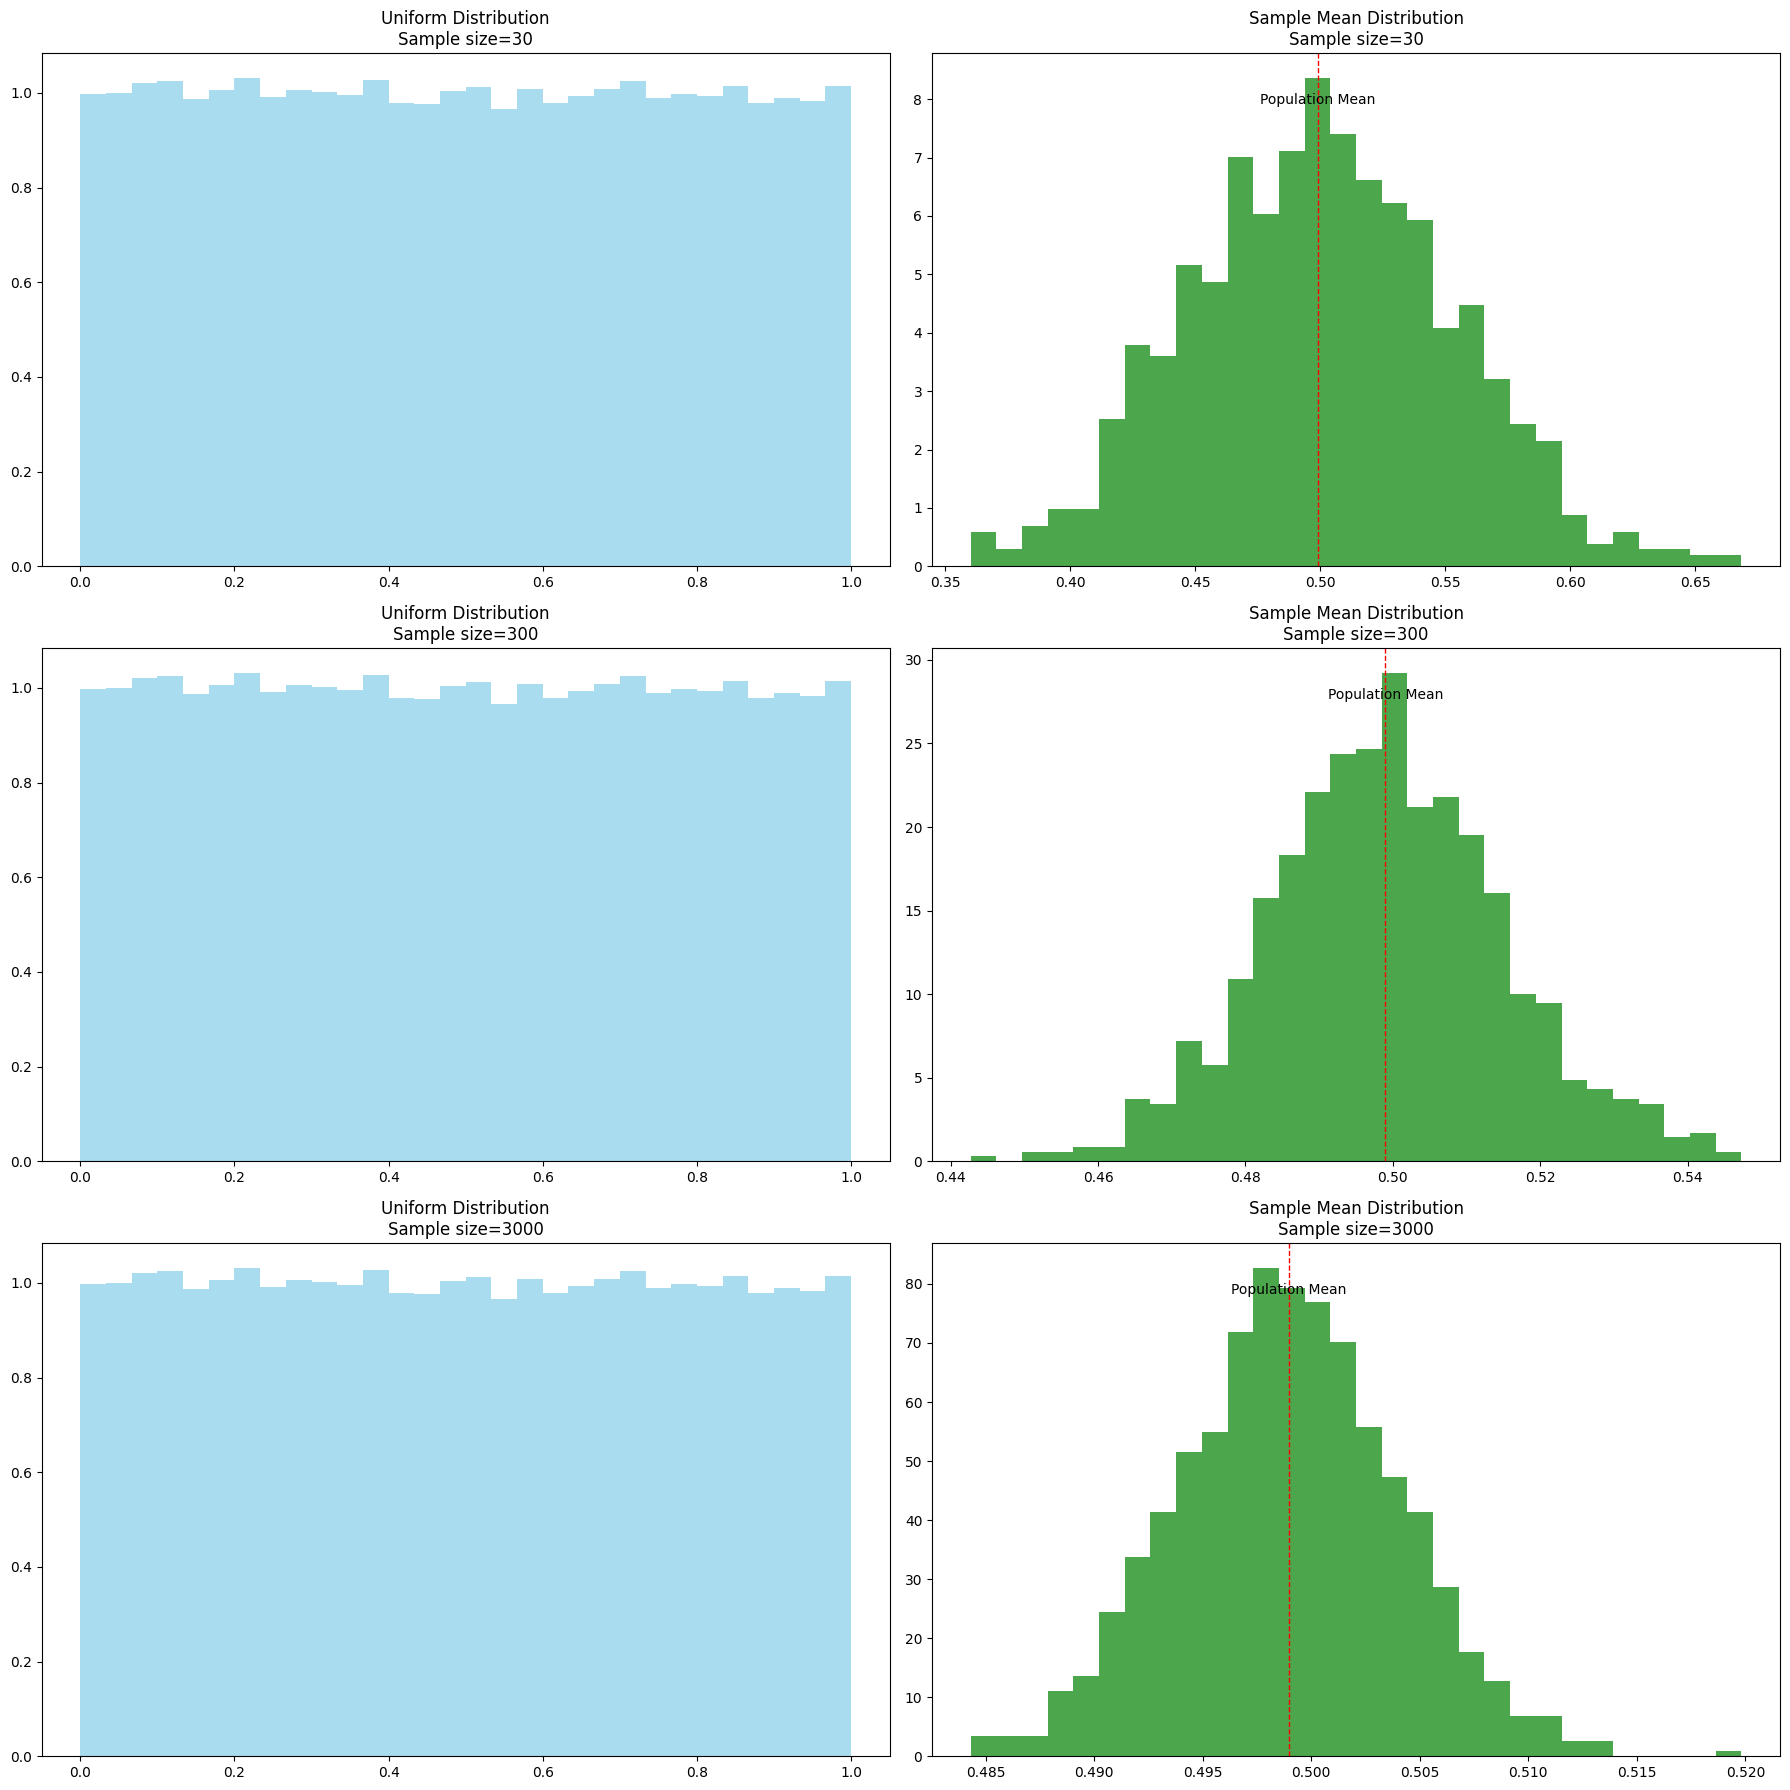

In [183]:
import numpy as np
import matplotlib.pyplot as plt

# 모집단 설정
population = np.random.uniform(low=0, high=1, size=100000)  # 균등 분포 모집단 #⭐
population_mean = np.mean(population)  # 모평균 계산
population_std = np.std(population)    # 모표준편차 계산

# 표본 크기 리스트
sample_sizes = [ 30, 300, 3000] #⭐ n(표본크기)이게 클수록 샘플평균분포가 정규분포가 된다.
sampling_cnt = 1000 #⭐ 샘플링할 횟수

plt.figure(figsize=(18, 18))



# 왼쪽: 균등 분포 히스토그램
for idx, size in enumerate(sample_sizes):
    sample_means = []

    # 1000번의 반복을 통해 표본 평균을 계산하고 저장
    for _ in range(sampling_cnt):
        sample = np.random.choice(population, size=size, replace=False)
        sample_means.append(np.mean(sample))  # 각 표본의 평균을 리스트에 저장




    # 왼쪽 균등 분포 시각화
    plt.subplot(len(sample_sizes), 2, idx * 2 + 1)
    plt.hist(population, bins=30, color='skyblue', alpha=0.7, density=True)  # 모집단의 균등 분포 히스토그램
    plt.title(f'Uniform Distribution\nSample size={size}')

    # 오른쪽 중심극한정리 시각화
    plt.subplot(len(sample_sizes), 2, idx * 2 + 2)
    plt.hist(sample_means, bins=30, color='green', alpha=0.7, density=True)  # 1000개의 표본 평균으로 히스토그램 생성
    plt.title(f'Sample Mean Distribution\nSample size={size}')
    plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=1)  # 모평균을 표시
    plt.text(population_mean, plt.ylim()[1]*0.9, 'Population Mean', horizontalalignment='center')

plt.tight_layout()
plt.show()


>📚광장에 모인사람들의 특성은 균등분포를 따랐었지만...
>
> n이 커질수록 **즉 샘플의 크기(그룹구성 인원 수)가 클수록**  표본 평균의 분포가 정규분포에 가까워지는 개형이 됨을 확인


In [184]:
# 각 표본 크기에 대한 표본 평균 계산 및 결과 저장
results = {}
for size in sample_sizes:
    sample_means = []
    sample_stds = []
    for _ in range(1000):  # 1000번의 반복을 통해 표본 평균과 표준편차 계산
        sample = np.random.choice(population, size=size, replace=True)
        sample_means.append(np.mean(sample))
        sample_stds.append(np.std(sample))
    results[size] = (sample_means, sample_stds)

# 결과 출력
population_mean = np.mean(population)  # 모평균 계산
population_std = np.std(population)    # 모표준편차 계산
print(f"Population Mean (모평균): {population_mean:.4f}")
print(f"Population Standard Deviation (모표준편차): {population_std:.4f}\n")

for size in sample_sizes:
    sample_means, sample_stds = results[size]

    # 계산된 표본 평균의 평균
    sample_mean_of_means = np.mean(sample_means)

    # 모평균과의 오차
    mean_error = abs(population_mean - sample_mean_of_means)

    # 계산된 표본 평균의 표준편차
    sample_std_of_means = np.std(sample_means)

    # 모표준편차와 표본 평균의 표준편차 간의 오차
    std_error = abs(population_std / np.sqrt(size) - sample_std_of_means)

    print(f"Sample size: {size}")
    print(f"  표본평균의 평균: {sample_mean_of_means:.4f}")
    print(f"  모평균과의 오차: {mean_error:.4f}")
    print(f"  계산된 표본 평균의 표준편차: {sample_std_of_means:.4f}")
    print(f"  모표준편차와 표본 평균의 표준편차 간의 오차: {std_error:.4f}\n")

Population Mean (모평균): 0.4990
Population Standard Deviation (모표준편차): 0.2889

Sample size: 30
  표본평균의 평균: 0.4979
  모평균과의 오차: 0.0011
  계산된 표본 평균의 표준편차: 0.0545
  모표준편차와 표본 평균의 표준편차 간의 오차: 0.0018

Sample size: 300
  표본평균의 평균: 0.4986
  모평균과의 오차: 0.0004
  계산된 표본 평균의 표준편차: 0.0162
  모표준편차와 표본 평균의 표준편차 간의 오차: 0.0005

Sample size: 3000
  표본평균의 평균: 0.4989
  모평균과의 오차: 0.0001
  계산된 표본 평균의 표준편차: 0.0053
  모표준편차와 표본 평균의 표준편차 간의 오차: 0.0000

